In [2]:

import pandas as pd
df = pd.read_csv('lmg_pretrained_pipeline_main_bce_weight.csv')
df


,bce_weight,lr,sensitivity,specificity,accuracy,precision,mcc,micro_auroc,train_bce,valid_bce,valid_mcc
0,0.25,0.0005,0.4003,0.9940,0.9632,0.7844,0.5447,0.9077,0.0172,0.0422,0.6038
1,0.25,0.0005,0.4705,0.9917,0.9647,0.7564,0.5801,0.9122,0.0016,0.0744,0.6038
2,0.25,0.0005,0.4434,0.9926,0.9642,0.7658,0.5665,0.8844,0.0011,0.0835,0.6036
3,0.25,0.0005,0.5167,0.9890,0.9646,0.7200,0.5925,0.9040,0.0028,0.0765,0.6103
4,0.25,0.0005,0.4083,0.9963,0.9659,0.8591,0.5787,0.9030,0.0002,0.0798,0.6267
...,...,...,...,...,...,...,...,...,...,...,...
130,2.00,0.0010,0.5199,0.9855,0.9614,0.6626,0.5673,0.9233,0.0090,0.3147,0.6090
131,4.00,0.0010,0.4673,0.9863,0.9594,0.6511,0.5314,0.9245,0.1228,0.2946,0.5871
132,10.00,0.0010,0.5439,0.9814,0.9587,0.6144,0.5565,0.9269,0.0537,0.8439,0.6034
133,20.00,0.0010,0.5662,0.9811,0.9596,0.6206,0.5716,0.9196,0.0987,1.9524,0.5934


In [3]:
df_stat_lr5 = df[df['lr'] == 5e-4].groupby(['bce_weight', 'lr']).aggregate(['mean', 'std']).reset_index()
df_stat_lr5

bce_weight      lr sensitivity           specificity           accuracy  \
                            mean       std        mean       std     mean   
0       0.10  0.0005     0.44818  0.040744     0.99142  0.002558  0.96332   
1       0.25  0.0005     0.44784  0.047693     0.99272  0.002709  0.96452   
2       0.50  0.0005     0.48614  0.041262     0.99062  0.002393  0.96450   
3       1.00  0.0005     0.49378  0.032127     0.98920  0.002891  0.96354   
4       2.00  0.0005     0.48838  0.015284     0.99054  0.000723  0.96454   
5       4.00  0.0005     0.48134  0.030592     0.98852  0.003318  0.96224   
6      10.00  0.0005     0.55120  0.053290     0.98430  0.006042  0.96184   
7      20.00  0.0005     0.60478  0.029893     0.97792  0.005077  0.95862   
8      40.00  0.0005     0.59328  0.059370     0.97748  0.009433  0.95762   

            precision                mcc           micro_auroc            \
        std      mean       std     mean       std        mean       std   
0  0.000952   0.74642  0.048748  0.56016  0.013186     0.90328  0.011699   
1  0.000973   0.77714  0.051463  0.57250  0.018063     0.90226  0.010618   
2  0.001544   0.74176  0.035717  0.58282  0.022459     0.91044  0.013461   
3  0.001716   0.71840  0.045285  0.57702  0.014373     0.91706  0.008899   
4  0.001038   0.73868  0.015713  0.58358  0.013424     0.91230  0.013920   
5  0.003368   0.69912  0.057239  0.56114  0.035023     0.91460  0.004912   
6  0.003275   0.66618  0.064438  0.58452  0.017610     0.92164  0.010811   
7  0.003920   0.60306  0.044137  0.58152  0.021983     0.92956  0.002898   
8  0.006312   0.60182  0.068019  0.57320  0.024175     0.92478  0.006804   

  train_bce           valid_bce           valid_mcc            
       mean       std      mean       std      mean       std  
0   0.00414  0.003322   0.03788  0.014121   0.59636  0.006226  
1   0.00458  0.007117   0.07128  0.016617   0.60964  0.009952  
2   0.01248  0.012089   0.10174  0.034880   0.61168  0.008691  
3   0.01618  0.019120   0.17836  0.051611   0.61356  0.007844  
4   0.01486  0.020403   0.30556  0.075007   0.61378  0.013827  
5   0.04712  0.048503   0.46650  0.176329   0.61334  0.016734  
6   0.04758  0.081735   1.22542  0.476560   0.61316  0.016452  
7   0.04894  0.023693   1.76902  0.327770   0.59518  0.017694  
8   0.14088  0.166080   3.32246  1.283110   0.58378  0.031531

In [4]:
df_stat_lr2 = df[df['lr'] == 2e-4].groupby(['bce_weight', 'lr']).aggregate(['mean', 'std']).reset_index()
df_stat_lr2

bce_weight      lr sensitivity           specificity           accuracy  \
                            mean       std        mean       std     mean   
0       0.10  0.0002     0.42680  0.076092     0.99170  0.002502  0.96244   
1       0.25  0.0002     0.45770  0.024922     0.98900  0.003219  0.96148   
2       0.50  0.0002     0.45136  0.025007     0.99204  0.001951  0.96402   
3       1.00  0.0002     0.45996  0.021049     0.98964  0.001595  0.96220   
4       2.00  0.0002     0.46250  0.019031     0.99006  0.001119  0.96274   
5       4.00  0.0002     0.47338  0.034671     0.98702  0.003711  0.96042   
6      10.00  0.0002     0.53940  0.024774     0.98270  0.001219  0.95970   
7      20.00  0.0002     0.53716  0.035936     0.98490  0.006307  0.96170   
8      40.00  0.0002     0.64464  0.040246     0.96316  0.012289  0.94668   

            precision                mcc           micro_auroc            \
        std      mean       std     mean       std        mean       std   
0  0.002342   0.74190  0.039968  0.54306  0.046248     0.89740  0.009958   
1  0.002614   0.69888  0.058278  0.54638  0.025045     0.89768  0.010646   
2  0.001003   0.75800  0.033908  0.56792  0.010480     0.89758  0.006345   
3  0.001430   0.70892  0.027751  0.55270  0.016736     0.90420  0.006716   
4  0.000802   0.71798  0.016979  0.55834  0.011646     0.90598  0.004568   
5  0.002249   0.67146  0.053704  0.54308  0.016020     0.91576  0.005712   
6  0.001153   0.62996  0.014179  0.56192  0.015921     0.92162  0.001385   
7  0.004204   0.67230  0.082282  0.57940  0.020383     0.91704  0.010650   
8  0.009745   0.50072  0.075751  0.53870  0.030843     0.92156  0.004673   

  train_bce           valid_bce           valid_mcc            
       mean       std      mean       std      mean       std  
0   0.00454  0.006293   0.03314  0.012297   0.59888  0.020061  
1   0.00814  0.008164   0.05188  0.012021   0.60278  0.011885  
2   0.00058  0.000785   0.10600  0.008514   0.61426  0.012159  
3   0.01238  0.015290   0.16130  0.036889   0.60040  0.008395  
4   0.01016  0.019183   0.29856  0.054115   0.59874  0.005629  
5   0.08022  0.002158   0.31120  0.013022   0.59218  0.007112  
6   0.15226  0.065441   0.63676  0.151293   0.58256  0.005904  
7   0.13068  0.158657   1.78158  0.913562   0.59452  0.021990  
8   0.31952  0.224267   1.68264  0.788868   0.56040  0.039128

In [5]:
df_stat_lr10 = df[df['lr'] == 1e-3].groupby(['bce_weight', 'lr']).aggregate(['mean', 'std']).reset_index()
df_stat_lr10

bce_weight     lr sensitivity           specificity           accuracy  \
                           mean       std        mean       std     mean   
0       0.10  0.001     0.45166  0.045295     0.99070  0.003405  0.96274   
1       0.25  0.001     0.50654  0.069696     0.98652  0.007573  0.96168   
2       0.50  0.001     0.49922  0.032432     0.98886  0.004012  0.96352   
3       1.00  0.001     0.50112  0.048193     0.98630  0.004848  0.96116   
4       2.00  0.001     0.49474  0.025028     0.98796  0.001894  0.96242   
5       4.00  0.001     0.49952  0.039901     0.98600  0.002656  0.96080   
6      10.00  0.001     0.52408  0.060965     0.98328  0.003159  0.95948   
7      20.00  0.001     0.60192  0.041406     0.97498  0.005808  0.95568   
8      40.00  0.001     0.65360  0.038466     0.97156  0.006295  0.95508   

            precision                mcc           micro_auroc            \
        std      mean       std     mean       std        mean       std   
0  0.000896   0.73284  0.051627  0.55634  0.007082     0.91324  0.008483   
1  0.003785   0.69138  0.085752  0.56896  0.010658     0.92150  0.003252   
2  0.002192   0.71772  0.064515  0.57936  0.011498     0.91948  0.011285   
3  0.002667   0.67440  0.061660  0.56018  0.018257     0.91894  0.009666   
4  0.001314   0.69304  0.026933  0.56664  0.015221     0.91038  0.025814   
5  0.001288   0.66312  0.027930  0.55512  0.017800     0.92250  0.005964   
6  0.002375   0.63310  0.035797  0.55416  0.035704     0.92922  0.005281   
7  0.003419   0.57236  0.040206  0.56268  0.007913     0.92322  0.009529   
8  0.004252   0.56036  0.038582  0.58090  0.012357     0.93640  0.007266   

  train_bce           valid_bce           valid_mcc            
       mean       std      mean       std      mean       std  
0   0.00516  0.004619   0.03468  0.012168   0.58650  0.009534  
1   0.01674  0.007779   0.04706  0.012404   0.59342  0.009581  
2   0.01308  0.014541   0.10238  0.032322   0.60800  0.006318  
3   0.03510  0.015543   0.12598  0.013122   0.60702  0.007192  
4   0.00772  0.005184   0.34966  0.085936   0.61526  0.009789  
5   0.03880  0.047165   0.49670  0.116388   0.60286  0.011192  
6   0.11558  0.089505   0.85478  0.273884   0.59244  0.014938  
7   0.10480  0.045827   1.68424  0.516435   0.58558  0.009910  
8   0.12488  0.045807   3.00634  0.913608   0.58344  0.017646

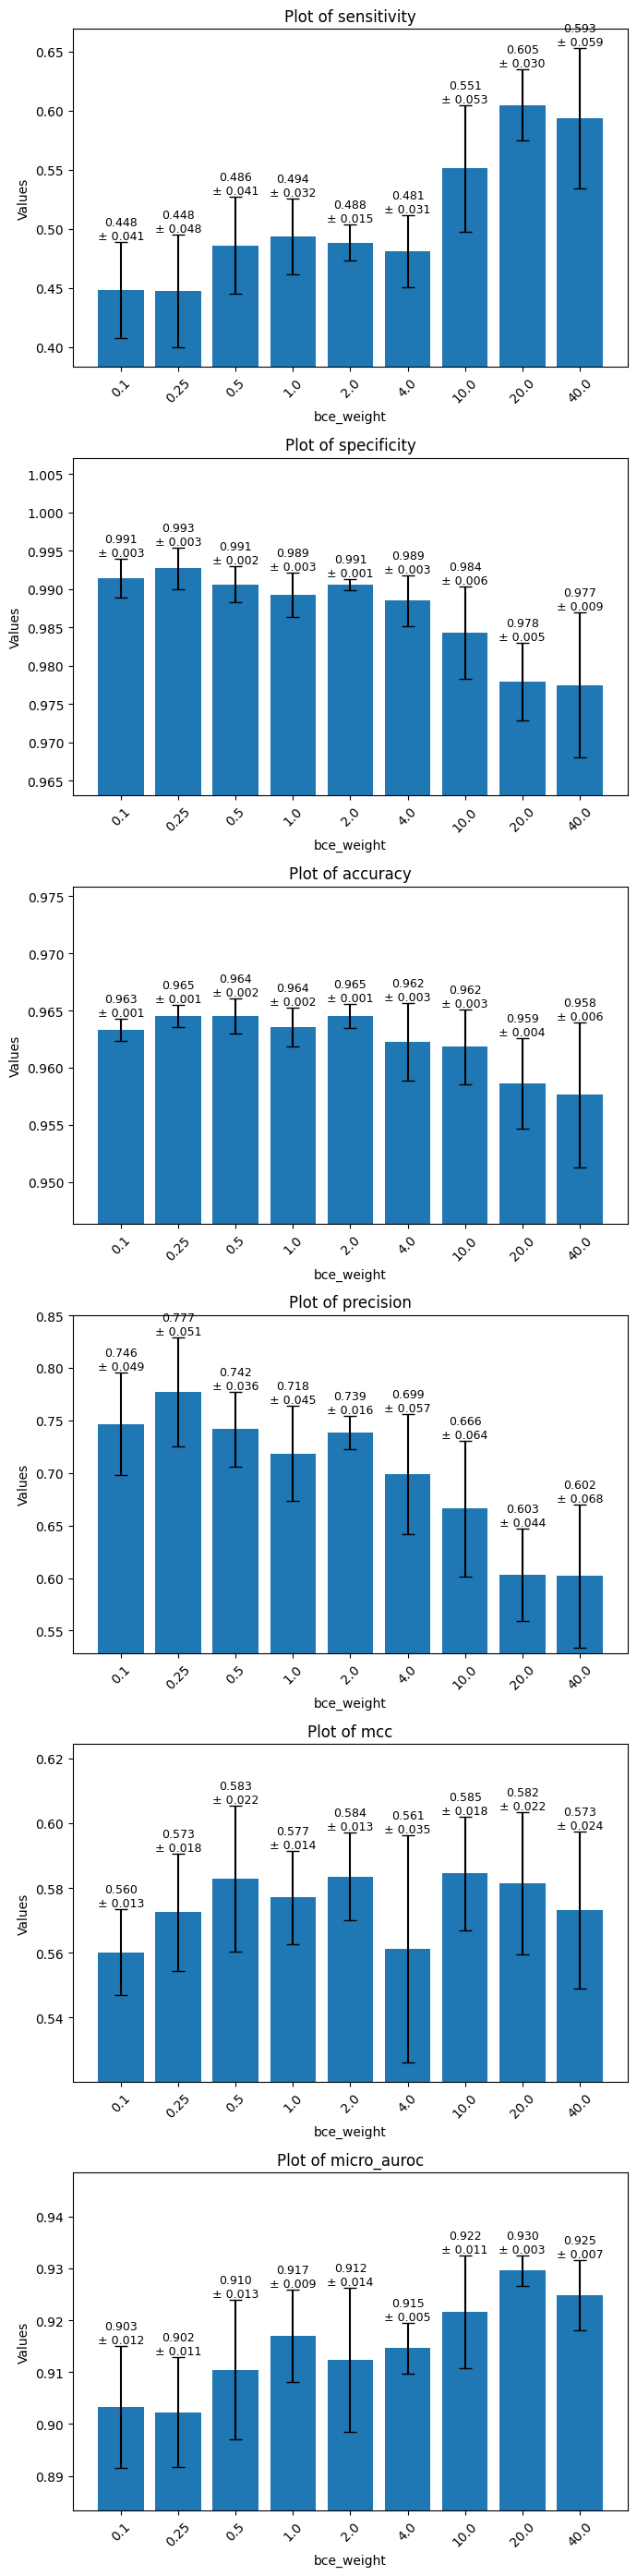

In [8]:

import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(6, figsize=(7, 28))

statistics = ['sensitivity', 'specificity', 'accuracy', 'precision', 'mcc', 'micro_auroc']

for i, stat in enumerate(statistics):
    df_part = df_stat_lr5[['bce_weight', stat]]
    ax = axs[i]
    
    index = np.arange(len(df_part))
    
    bars = ax.bar(index, df_part[(stat, 'mean')], yerr=df_part[(stat, 'std')], capsize=5)
    
    ax.set_ylabel('Values')  # y-axis label
    ax.set_xlabel('bce_weight')  # x-axis label
    ax.set_title('Plot of ' + stat)  # plot title
    ax.set_xticks(index)  # setting x-ticks position
    ax.set_xticklabels(df_part['bce_weight'], rotation=45)  # setting x-ticks labels with rotation
    ax.set_ylim(df_part[(stat, 'mean')].min() - df_part[(stat, 'std')].max() - 0.005, df_part[(stat, 'mean')].max() + df_part[(stat, 'std')].max() + 0.005)  # setting y-axis limits
    
    for i, bar in enumerate(bars):
        yval = bar.get_height()
        std = df_part[(stat, 'std')][i]
        ax.text(bar.get_x()  + bar.get_width()/2.0,  yval + std,
                f'{yval:.3f}\n± {std:.3f}', ha='center', va='bottom', fontsize=9)
        
    # df_part_2 = df_stat_lr10[['bce_weight', stat]]
    # ax.plot(index, df_part_2[(stat, 'mean')], 'ro', label='lr=10')
    # print(df_part_2[(stat, 'mean')])

plt.tight_layout()  # adjust subplot parameters to give specified padding
plt.show()  # display the figure

In [7]:
np.arange(len(df_part))

array([0, 1, 2, 3, 4, 5, 6, 7, 8])